**Créditos:** Esta atividade é uma adaptação dos tutoriais ATLAS-RECAST para o *US-ATLAS Computing Bootcamp* realizado no LBNL (*Lawrence Berkeley National Laboratory*) e na Universidade de Vitória  (*University of Victoria RECAST Bootcamp*).  A atividade  faz uso de conteúdo original desenvolvido por Danika MacDonell, Matthew Feickert, Lukas Heinrich, Karol Krizka, Samuel Meehan, Adam Parker e Giordon Stark.

**Objetivos:**

*   Familiarizar-se com o contexto da física para nossa "análise de brinquedo" (*toy analysis*).
*   Praticar a compilação executando um laço de eventos simplificado (`event loop`)  sobre nossa amostra de sinal para obter algumas distribuições de interesse.
*   Ter uma ideia (mas não necessariamente uma compreensão exaustiva) de como nossa "análise de brinquedo" é codificada.

# 1. Introdução

Para que você se familiarize com o desenvolvimento de um fluxo completo de uma  análise, nosso desenvolvimento será  em torno de uma "análise de brinquedo" (*toy analysis*). Tenha em mente que nesta etapa você vai precisar deixar de lado suas noções de otimização de análise (que você aprendeu na seção de *Machine Learning* desta Escola, pois não estamos usando aprendizado de máquina em nossa "análise de brinquedo") e como as estruturas de análise "deveriam" ser projetadas. Agora o nosso objetivo é apenas fornecer uma "carga útil" de análise muito simples para você trabalhar.

A análise que faremos é uma versão "espantalho" do canal de busca de Higgs “VHbb”, com o Higgs decaindo para quarks *b*:


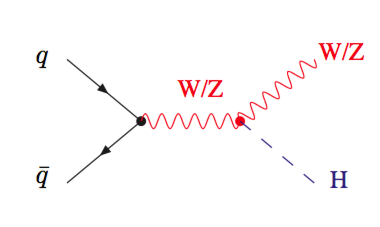



Para os propósitos desta atividade, vamos focar no canal no qual um bóson *Z* decai para dois léptons carregados que são elétrons ou múons. Este é o sinal que você já deve ter baixado na parte de configuração desta atividade (`Atividade1_setup.ipynb`).


O desafio desta busca é reconstruir a decaimento do Higgs para um par de quarks *b*, que aparecem no detector como jatos hadrônicos (Para saber mais, sugerimos essa publicação: [Jets in Hadron-Hadron Collisions](https://arxiv.org/pdf/0712.2447)). Entretanto, se você puder identificar corretamente os dois jatos que se originam do decaimento do Higgs, então você pode invocar a conservação de quadri-momento e reconstruir a massa invariante desse decaimento.

Portanto, ao longo desta atividade, este será o principal observável que exploraremos: **a massa invariante de um par de jatos hadrônicos** como mostra a figura a seguir:


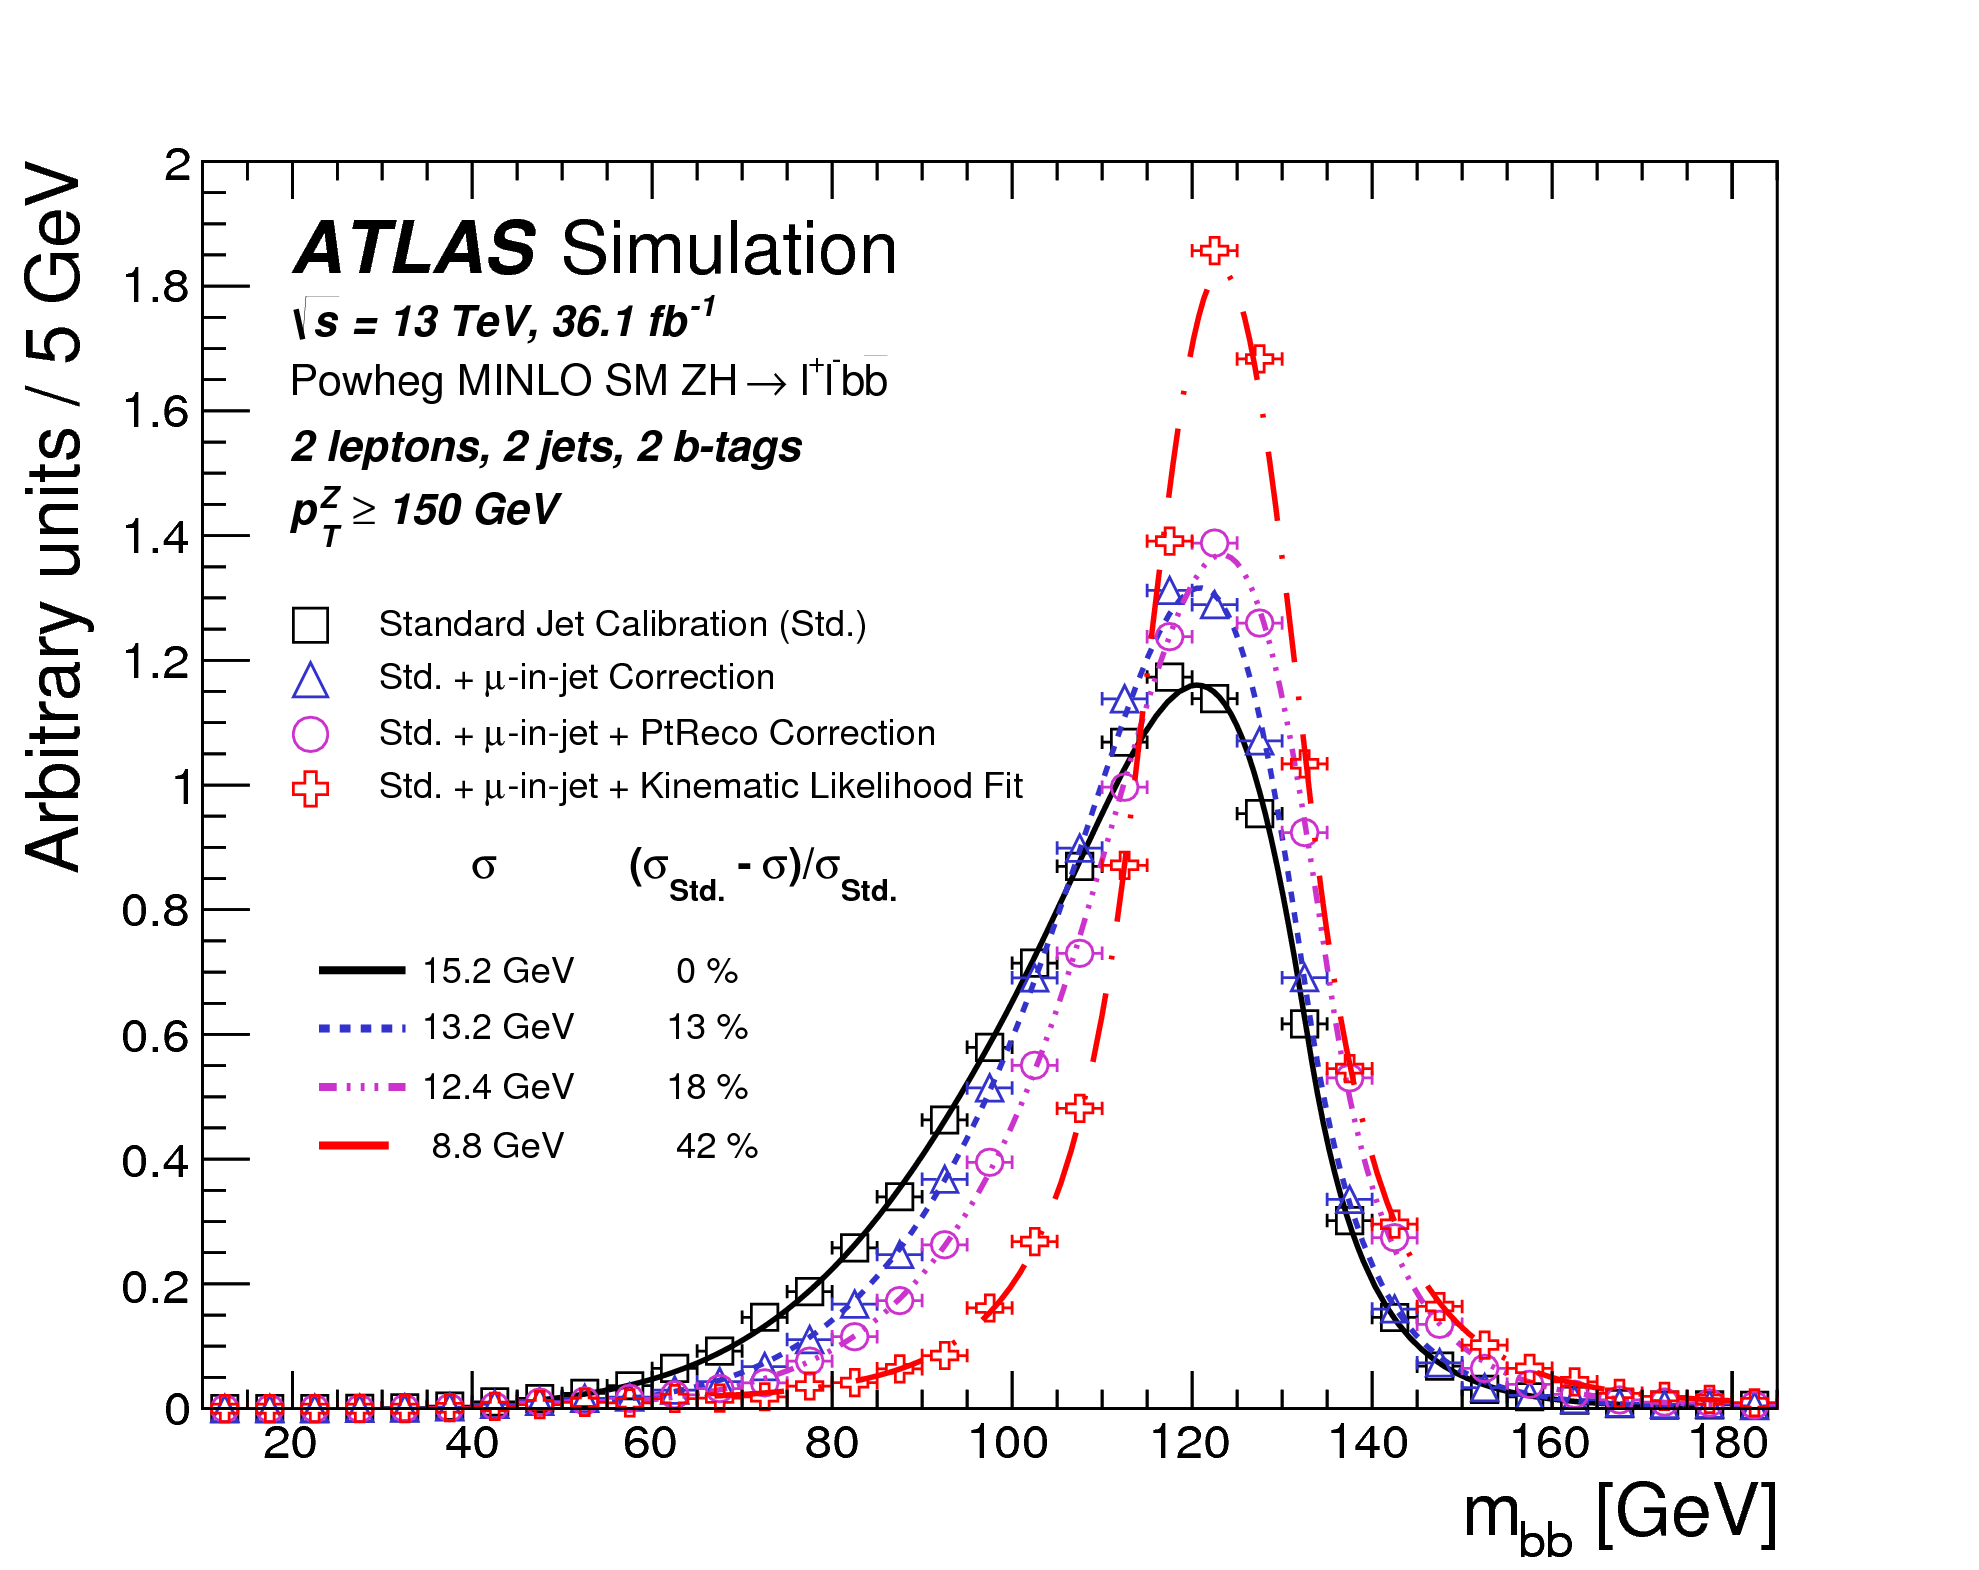

# 2. Rodando uma "análise de brinquedo" (*toy analysis*)

Primeiramente, acesse:


https://gitlab.cern.ch/recast-atlas/tutorial/event-selection-tutorial


o projeto é público e pode ser acessado sem necessidade de autenticação. Faça um fork pessoal deste repositório `event-selection-tutorial` clicando no botão branco `Fork` no canto superior direito (logo ao lado do botão azul `Code`). Clone seu fork do repositório em sua máquina local (ou seja, não no lxplus):

**Bash**

ssh clone:

`git clone --recursive ssh://git@gitlab.cern.ch:7999/[seu_username]/event-selection-tutorial.git`

https clone:

`git clone --recursive https://gitlab.cern.ch/[seu_username]/event-selection-tutorial.git`

Você precisa usar o clone --recursive aqui porque dentro da análise, no diretório `source`, há um submódulo `JetSelectionHelper`. É recomendado, e essencial, trabalhar com submódulos para preservar sua análise.





E se ainda  não fez, "puxe" a imagem docker `atlas/analysisbase:21.2.85-centos7`

**Bash**

`docker pull atlas/analysisbase:21.2.85-centos7`





# 3. Configurando o ambiente `AnalysisBase`

Assim que  o download da amostra de sinal DAOD for concluído (Atividade1_setup.ipynb), execute a imagem docker `atlas/analysisbase:21.2.85-centos7` no modo interativo, montando o volume do arquivo de dados e o diretório atual no container:


**Bash**



```
cd event-selection-tutorial
docker run --rm -it -v /caminho_completo/para_arquivo/DAOD_EXOT27.17882736._000008.pool.root.1:/Data/signal_daod.root -v $PWD:/Tutorial atlas/analysisbase:21.2.85-centos7 bash
```




Sugestão de organização:
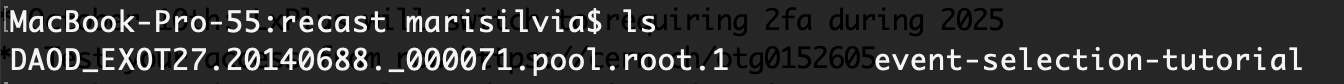

 Agora você já deve se encontrar no container `atlas/analysisbase:21.2.85-centos7`, com um prompt de comando parecido com:

 **Saída**


```
[bash][atlas]:workdir >
```

Agora dê um `source` no *script* de preparação para lançar o processo de configuração do ambiente que contém as dependências da versão do software do ATLAS:

**Bash**

`[bash][atlas]:workdir > . ~/release_setup.sh`

Ao final, você deve ter esse ambiente:

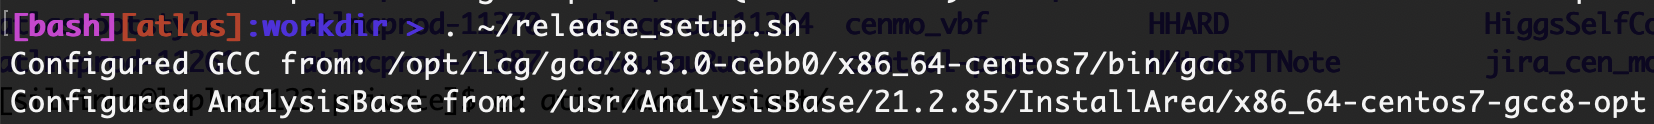



Ao final você vai estar com essa configuração:



```
[bash][atlas AnalysisBase-21.2.85]:workdir >
```




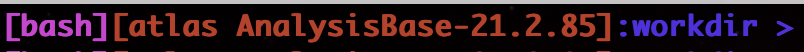


Ou seja, você configurou todos os caminhos para permitir o uso das bibliotecas pré-compiladas do `AnalysisBase` para construir seu código.

#  4. Preparativos para executar

Agora vá  para o diretório `/Tutorial` que montamos dentro do container usando `-v`, e dê um `ls` para confirmar que ele tem o mesmo conteúdo que o repositório git recast-standalone. Verifique também se o diretório `/Data `(também montado com `-v`) contém o arquivo  DAOD do sinal:

**Bash**


```
cd /Tutorial
ls
```

**Saída**


```
README.md  source
```

**Bash**



```
ls /Data
```

**Saída**



```
signal_daod.root
```

Toda a sequência de comandos vai gerar essa configuração:

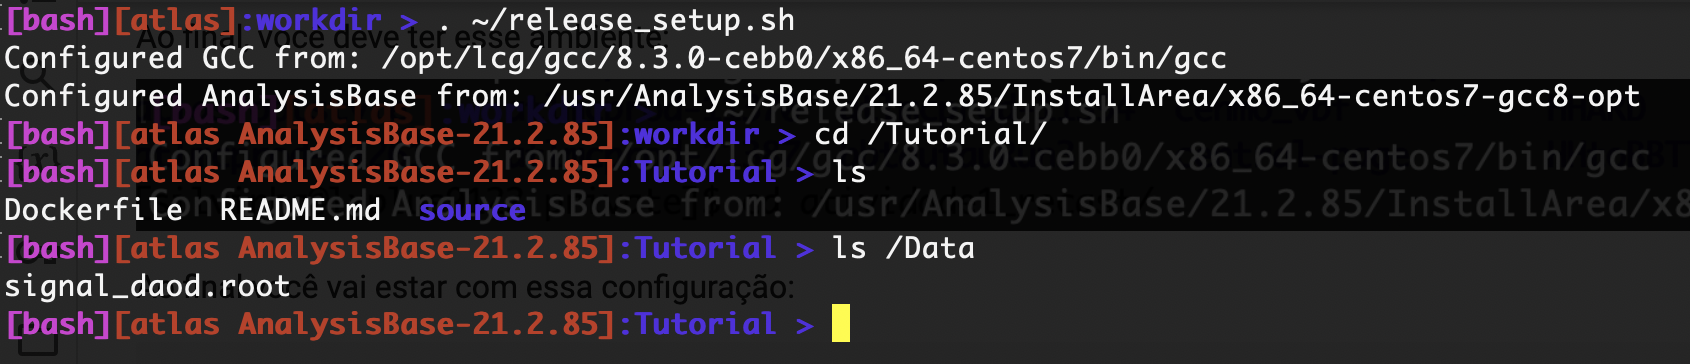


E agora, crie diretórios de compilação e execução e use `cmake` para compilar o código no diretório de compilação:

**Bash**

```

mkdir build run
cd build
cmake ../source
make
```



# 5. Executando `AnalysisPayload`

O comando `cmake../source ` gerou:

```
-- The C compiler identification is GNU 8.3.0
-- The CXX compiler identification is GNU 8.3.0
-- Check for working C compiler: /opt/lcg/gcc/8.3.0-cebb0/x86_64-centos7/bin/gcc
-- Check for working C compiler: /opt/lcg/gcc/8.3.0-cebb0/x86_64-centos7/bin/gcc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /opt/lcg/gcc/8.3.0-cebb0/x86_64-centos7/bin/g++
-- Check for working CXX compiler: /opt/lcg/gcc/8.3.0-cebb0/x86_64-centos7/bin/g++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found AnalysisBase: /usr/AnalysisBase/21.2.85/InstallArea/x86_64-centos7-gcc8-opt (version: 21.2.85)
-- Found AnalysisBaseExternals: /usr/AnalysisBaseExternals/21.2.85/InstallArea/x86_64-centos7-gcc8-opt (version: 21.2.85)
-- Setting ATLAS specific build flags
-- checker_gccplugins library not found
-- Package(s) in AnalysisBaseExternals: 20
-- Using the LCG modules without setting up a release
-- Package(s) in AnalysisBase: 174
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Check if compiler accepts -pthread
-- Check if compiler accepts -pthread - yes
-- Found Threads: TRUE  
-- Configuring ATLAS project with name "UserAnalysis" and version "1.0.0"
-- Using build type: RelWithDebInfo
-- Using platform name: x86_64-centos7-gcc8-opt
-- Cleaning stale files from build area
-- Unit tests will be built by default
-- Found 2 package(s)
-- Considering package 1 / 2
-- No package filtering rules read
-- Configuring the build of package: AnalysisPayload
-- Found ROOT: /usr/AnalysisBaseExternals/21.2.85/InstallArea/x86_64-centos7-gcc8-opt/include (found version "6.16/00")
-- Configuring the build of package: JetSelectionHelper
-- Number of packages configured: 2
-- Time for package configuration: 0 seconds
-- Including the packages from project AnalysisBase - 21.2.85...
-- Including the packages from project AnalysisBaseExternals - 21.2.85...
-- Generated file: /Tutorial/build/x86_64-centos7-gcc8-opt/packages.txt
-- Generated file: /Tutorial/build/x86_64-centos7-gcc8-opt/compilers.txt
-- Generated file: /Tutorial/build/x86_64-centos7-gcc8-opt/ReleaseData
-- Generating external environment configuration
-- Writing runtime environment to file: /Tutorial/build/x86_64-centos7-gcc8-opt/env_setup.sh
-- Configuring done
-- Generating done
-- Build files have been written to: /Tutorial/build
```

Em seguida, o comando `make` gerou:



```
[  0%] Built target Package_JetSelectionHelper_tests
Scanning dependencies of target Package_AnalysisPayload_tests
[  0%] Built target Package_AnalysisPayload_tests
Scanning dependencies of target atlas_tests
[  0%] Built target atlas_tests
Scanning dependencies of target AnalysisPayloadExeAttribSet
[  0%] Built target AnalysisPayloadExeAttribSet
Scanning dependencies of target JetSelectionHelperLib
[ 14%] Building CXX object JetSelectionHelper/CMakeFiles/JetSelectionHelperLib.dir/src/JetSelectionHelper.cxx.o
[ 28%] Linking CXX shared library ../x86_64-centos7-gcc8-opt/lib/libJetSelectionHelperLib.so
Detaching debug info of libJetSelectionHelperLib.so into libJetSelectionHelperLib.so.dbg
[ 28%] Built target JetSelectionHelperLib
Scanning dependencies of target AnalysisPayload
[ 42%] Building CXX object AnalysisPayload/CMakeFiles/AnalysisPayload.dir/utils/AnalysisPayload.cxx.o
[ 57%] Linking CXX executable ../x86_64-centos7-gcc8-opt/bin/AnalysisPayload
Detaching debug info of AnalysisPayload into AnalysisPayload.dbg
[ 57%] Built target AnalysisPayload
Scanning dependencies of target Package_AnalysisPayload
[ 71%] Built package AnalysisPayload
AnalysisPayload: Package build succeeded
[ 71%] Built target Package_AnalysisPayload
Scanning dependencies of target JetSelectionHelperHeaderInstall
[ 85%] Generating ../x86_64-centos7-gcc8-opt/include/JetSelectionHelper
[ 85%] Built target JetSelectionHelperHeaderInstall
Scanning dependencies of target Package_JetSelectionHelper
[100%] Built package JetSelectionHelper
JetSelectionHelper: Package build succeeded
[100%] Built target Package_JetSelectionHelper
```

Em seguida, `source  setup.sh` para tornar  executável `AnalysisPayload`:

**Bash**

```
. x86_64-centos7-gcc8-opt/setup.sh
```
Agora é hora de executar o `AnalysisPayload` para fazer um loop sobre os jatos em cada evento - aplicando alguns cortes simples - e produzir histogramas ROOT com distribuições do número de jatos e da massa invariante do sistema de par de jatos (de maior momento transverso). O arquivo de entrada (DAOD do sinal) , o arquivo ROOT de saída e o número de eventos a serem executados são fornecidos como argumentos de linha de comando:



```
cd ../run
AnalysisPayload /Data/signal_daod.root output_hist.root 10000
```

Se a execução for bem-sucedida, você deverá ter um histograma chamado  `output_hist.root` no diretório de execução atual e dois arquivos PDF  dos histogramas contidos em `output_hist.root`.

**Bash**

```
ls
```

**Saída**

```
mjj.pdf			njets.pdf		output_hist.root
```

Para um teste rápido limitamos o número de eventos para 10000. Mas você pode rodar sobre todos os eventos disponíveis no arquivo, bastando suprimir o terceiro argumento do comando:

```
cd ../run
AnalysisPayload /Data/signal_daod.root output_hist.root
```


Agora fora do container,  faça `cd` no diretório `event-selection-tutorial/run`  (que deveria ter sido criado, já que o diretório event-selection-tutorial era montado em volume) e abra os arquivos pdf. Verifique se eles se parecem com:

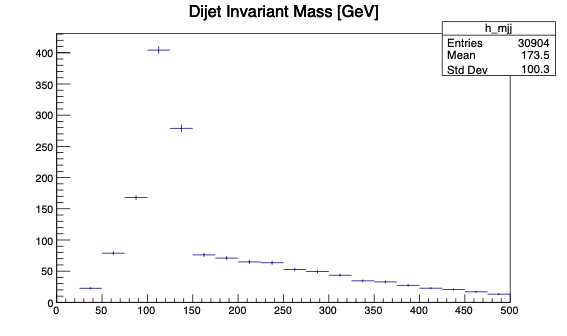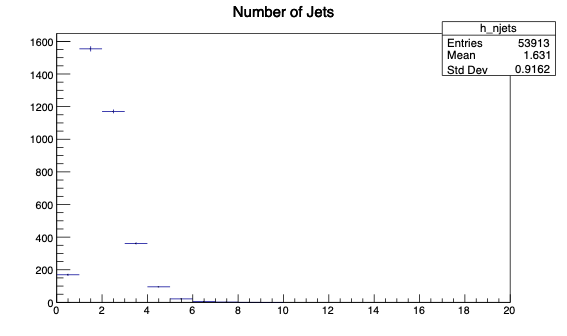

# 6. Resumindo o que fizemos nesta etapa

Agora que executamos nosso código de análise, ainda não exploramos exatamente o que o código faz.  O que sabemos é que dissemos para  o código:


*   onde encontrar um arquivo de entrada (de algum tipo especificado, neste caso um arquivo ROOT DAOD_EXOT27);
*   um número de eventos para executar;
*   e o local para gravar um arquivo de saída.

E o que o código nos deu foi um arquivo ROOT de saída naquele local. :-).